In [1]:
from typing import Callable
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from tqdm.auto import tqdm

See https://en.wikipedia.org/wiki/Order_statistic.

In [2]:
def bootstrap(
    data: np.ndarray,
    statistic: Callable,
    sample_size: int,
    num_trials: int = 1000
) -> np.ndarray:
    """Compute a statistic multiple times using bootstrap samples.

    Args:
        data (np.ndarray): dataset to sample
        statistic (Callable): statistic to compute
        sample_size (int): number of samples in each bootstrap sampmle
        num_trials (int, optional): number of bootstrap samples to process

    Returns:
        np.ndarray: statistic of interest for each bootstrap sample
    """
    stats = []
    for _ in tqdm(range(num_trials), leave=False):
        sample = np.random.choice(data, size=sample_size, replace=True)
        stats.append(statistic(sample))
    return np.array(stats)

In [3]:
num_samp = 1000
num_bootstrap = 1000
group_size = 5


samples = np.random.randn(num_samp)
bootstrap_samples = bootstrap(samples, max, group_size, num_bootstrap)

  0%|          | 0/1000 [00:00<?, ?it/s]

# Bootstrap histogram

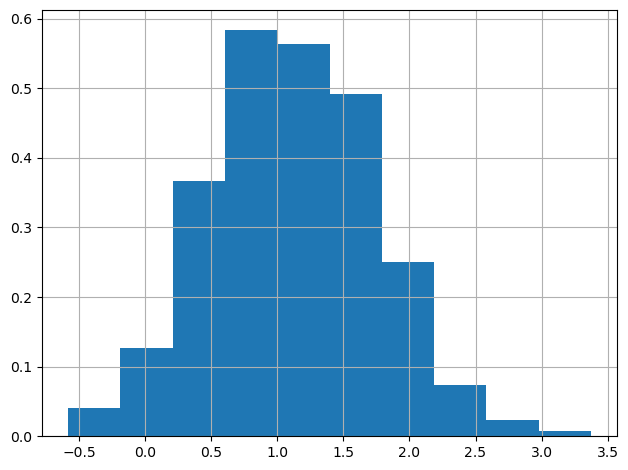

In [4]:
fig, axes = plt.subplots()
axes.hist(bootstrap_samples, density=True)
axes.grid()
fig.tight_layout()

# Empirical CDF

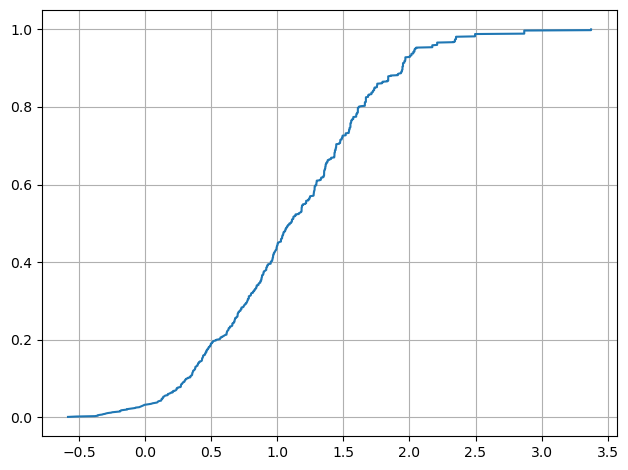

In [5]:
bootstrap_samples = np.sort(bootstrap_samples)
emp_cdf = np.arange(1, num_samp + 1) / num_samp

fig, axes = plt.subplots()
axes.plot(bootstrap_samples, emp_cdf)
axes.grid()
fig.tight_layout()

# Empirical CDF w/theoretical overlay

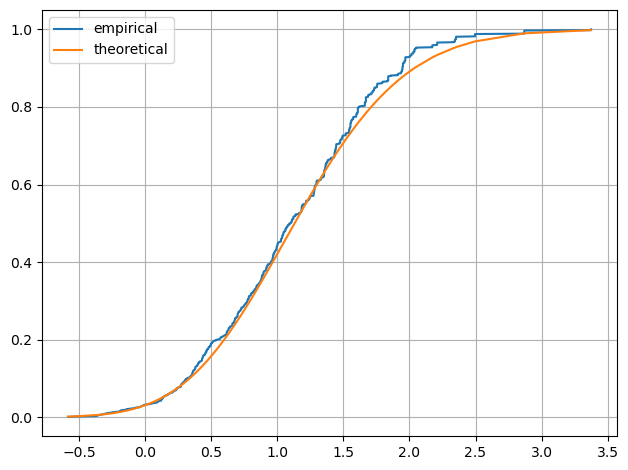

In [6]:
bootstrap_samples = np.sort(bootstrap_samples)
emp_cdf = np.arange(1, num_samp + 1) / num_samp

theo_cdf = norm().cdf(bootstrap_samples) ** group_size

fig, axes = plt.subplots()
axes.plot(bootstrap_samples, emp_cdf, label='empirical')
axes.plot(bootstrap_samples, theo_cdf, label='theoretical')
axes.legend()
axes.grid()
fig.tight_layout()